In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from neural_exploration import *

### MDP settings

In [3]:
H = 3
n_states = 2
n_actions = 2
n_features = 8

noise_std = 0.01

n_episodes = int(1e4)
n_sim = 1

SEED = 42
np.random.seed(SEED)

### LinUCB-VI on a Linear MDP

In [4]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.dot(x, a)

mdp = MDPFeatures(H,
                  n_states=n_states,
                  n_actions=n_actions,
                  n_features=n_features,
                  reward_func=reward_func,
                  noise_std=noise_std,
                  seed=SEED,
                  )

# to check that backward induction works
mdp.sanity_policy()

In [5]:
regrets = np.empty((n_sim, n_episodes))

for i in range(n_sim):
    mdp.reset_rewards()
    model = LinUCBVI(mdp,
                     n_episodes=n_episodes,
#                      init_state=0,
                     reg_factor=1,
#                      confidence_scaling_factor=1.0,
                     confidence_scaling_factor=noise_std,
                    )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:13<00:00, 755.72it/s, total regret=1.03]


### Sublinear regret growth : exploration is efficient, the optimal policy is closely approximated.

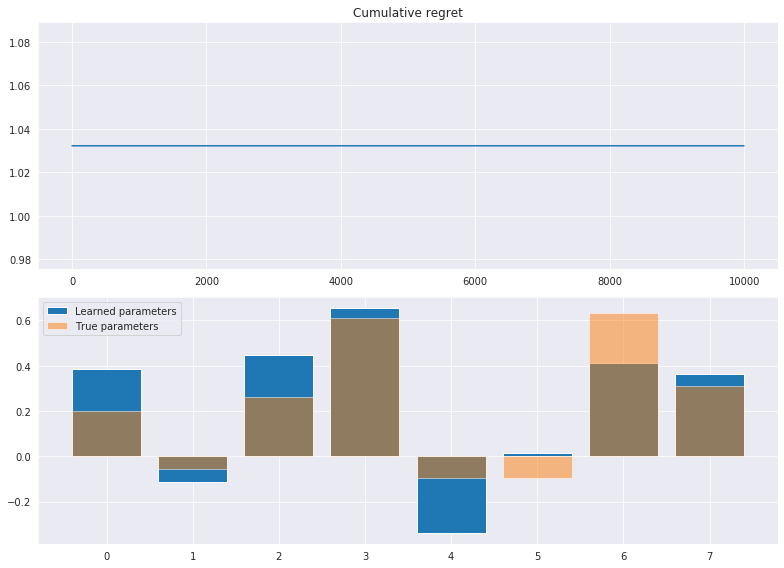

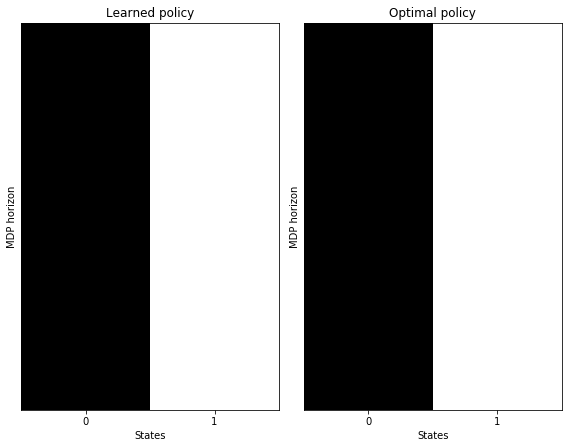

In [6]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(11, 8), nrows=2, ncols=1)

    ax = axes[0]
    t = np.arange(n_episodes)
    mean_regrets = np.mean(regrets, axis=0)
    std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
    ax.plot(mean_regrets)
    ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    ax.set_title('Cumulative regret')

    ax = axes[1]
    index = range(mdp.n_features)
    ax.bar(index, model.theta[-1], label='Learned parameters')
    ax.bar(index, a, label='True parameters', alpha=0.5)
    ax.legend()

    plt.tight_layout()
    plt.show()
    
    fig.savefig('figures/linucbvi_linear.pdf')

fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=2)
ax = axes[0]
ax.imshow(model.policy, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_xticks(range(mdp.n_states))
ax.set_xlabel('States')
ax.set_yticks([])
ax.set_ylabel('MDP horizon')
ax.set_title('Learned policy')

ax = axes[1]
ax.imshow(model.pi_star, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_xticks(range(mdp.n_states))
ax.set_xlabel('States')
ax.set_yticks([])
ax.set_ylabel('MDP horizon')
ax.set_title('Optimal policy')

plt.tight_layout()
plt.show()

fig.savefig('figures/linucbvi_linear_policy.pdf')

### LinUCB-VI on a Linear transition/quadratic reward MDP

In [7]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.dot(x, a)**2

mdp = MDPFeatures(H,
                  n_states=n_states,
                  n_actions=n_actions,
                  n_features=n_features,
                  reward_func=reward_func,
                  noise_std=noise_std,
                  seed=SEED,
                  )

# to check that backward induction works
mdp.sanity_policy()

In [8]:
regrets = np.empty((n_sim, n_episodes))

for i in range(n_sim):
    mdp.reset_rewards()
    model = LinUCBVI(mdp,
                     n_episodes=n_episodes,
                     init_state=0,
                     reg_factor=1,
                     confidence_scaling_factor=noise_std,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:14<00:00, 703.88it/s, total regret=2.54e+3]


### Linear regret

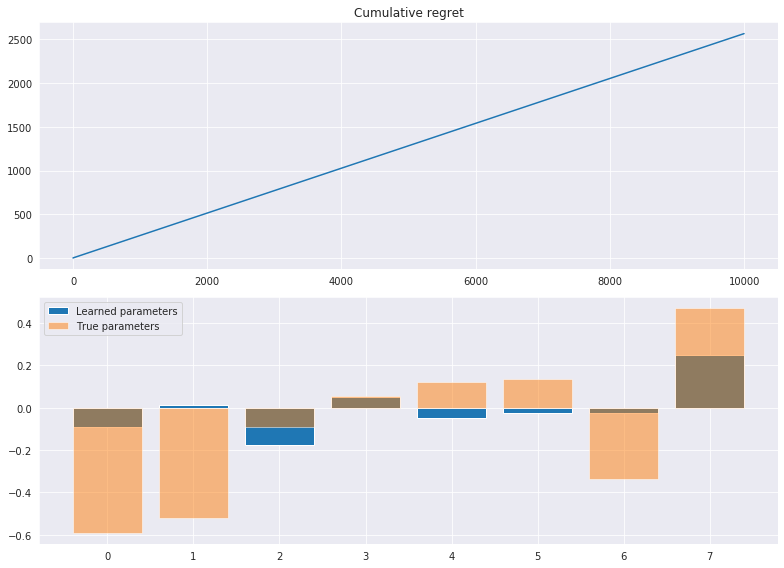

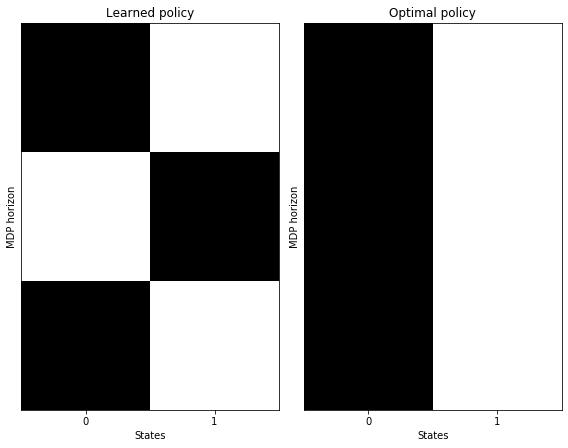

In [9]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(11, 8), nrows=2, ncols=1)

    ax = axes[0]
    t = np.arange(n_episodes)
    mean_regrets = np.mean(regrets, axis=0)
    std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
    ax.plot(mean_regrets)
    ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    ax.set_title('Cumulative regret')

    ax = axes[1]
    index = range(mdp.n_features)
    ax.bar(index, model.theta[-1], label='Learned parameters')
    ax.bar(index, a, label='True parameters', alpha=0.5)
    ax.legend()

    plt.tight_layout()
    plt.show()
    
    fig.savefig('figures/linucbvi_quad.pdf')

fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=2)
ax = axes[0]
ax.imshow(model.policy, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_xticks(range(mdp.n_states))
ax.set_xlabel('States')
ax.set_yticks([])
ax.set_ylabel('MDP horizon')
ax.set_title('Learned policy')

ax = axes[1]
ax.imshow(model.pi_star, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_xticks(range(mdp.n_states))
ax.set_xlabel('States')
ax.set_yticks([])
ax.set_ylabel('MDP horizon')
ax.set_title('Optimal policy')

plt.tight_layout()
plt.show()

fig.savefig('figures/linucbvi_quad_policy.pdf')

### LinUCB-VI on a Linear transition/nonlinear reward MDP

In [10]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.cos(10*np.pi*np.dot(x, a))

mdp = MDPFeatures(H,
                  n_states=n_states,
                  n_actions=n_actions,
                  n_features=n_features,
                  reward_func=reward_func,
                  noise_std=noise_std,
                  seed=SEED,
                  )

# to check that backward induction works
mdp.sanity_policy()

In [11]:
regrets = np.empty((n_sim, n_episodes))

for i in range(n_sim):
    mdp.reset_rewards()
    model = LinUCBVI(mdp,
                     n_episodes=n_episodes,
                     init_state=0,
                     reg_factor=1,
                     confidence_scaling_factor=noise_std,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 10000/10000 [00:14<00:00, 699.36it/s, total regret=780]


### Linear regret growth, reward is now "too nonlinear" for LinUCB-VI to be relevant.

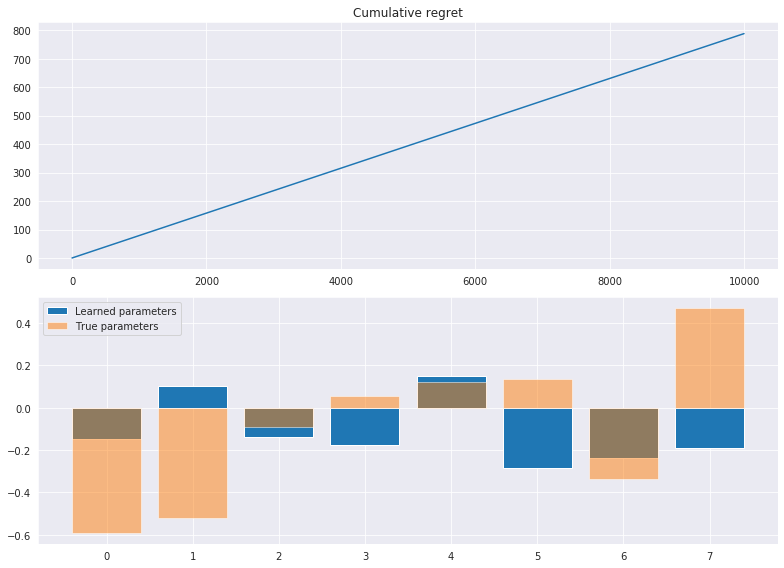

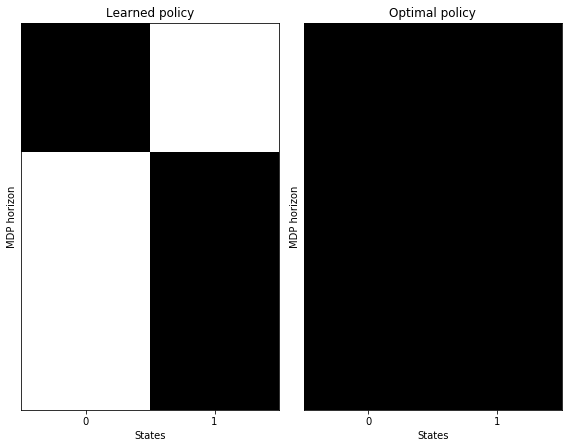

In [12]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(11, 8), nrows=2, ncols=1)

    ax = axes[0]
    t = np.arange(n_episodes)
    mean_regrets = np.mean(regrets, axis=0)
    std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
    ax.plot(mean_regrets)
    ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    ax.set_title('Cumulative regret')

    ax = axes[1]
    index = range(mdp.n_features)
    ax.bar(index, model.theta[-1], label='Learned parameters')
    ax.bar(index, a, label='True parameters', alpha=0.5)
    ax.legend()

    plt.tight_layout()
    plt.show()
    
    fig.savefig('figures/linucbvi_cosine.pdf')

fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=2)
ax = axes[0]
ax.imshow(model.policy, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_xticks(range(mdp.n_states))
ax.set_xlabel('States')
ax.set_yticks([])
ax.set_ylabel('MDP horizon')
ax.set_title('Learned policy')

ax = axes[1]
ax.imshow(model.pi_star, cmap='gray', vmin=0, vmax=mdp.n_actions-1)
ax.set_xticks(range(mdp.n_states))
ax.set_xlabel('States')
ax.set_yticks([])
ax.set_ylabel('MDP horizon')
ax.set_title('Optimal policy')

plt.tight_layout()
plt.show()

fig.savefig('figures/linucbvi_cosine_policy.pdf')